[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



**Categorical**: describes a category like red, green, or blue

**Quantitative**: describes a numerical amount like 75.4 degrees fahrenheit or 3 people
> **Discrete**: can only describe countable finite values like 3 people or 12 books

> **Continuous**: can contain infinite possible values within a range like 75.4 degrees or 2.76cm long

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

In [ ]:
carbon_west.head(10)

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions.

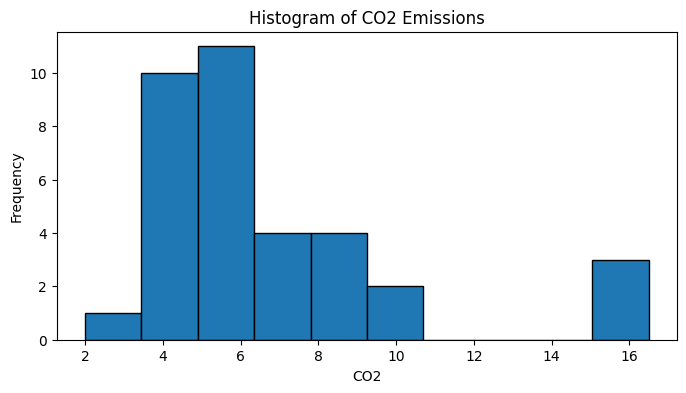

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.show()

Part b. Find the mean, median, and standard deviation.

In [ ]:
# Calculate mean, median, and standard deviation
mean_value = np.mean(carbon_west["CO2"])
median_value = np.median(carbon_west["CO2"])
std_deviation = np.std(carbon_west["CO2"])
variance = np.var(carbon_west["CO2"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727
Variance: 10.94713469387755


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [ ]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders_without_DC = murders[:50]

Part a. Find the mean and standard deviation for murders without D.C.

In [ ]:
#murders_without_DC calculated in previous step
mean_without_DC = np.mean(murders_without_DC["murder"])
median_without_DC = np.median(murders_without_DC["murder"])
std_deviation = np.std(murders_without_DC["murder"])
variance = np.var(murders_without_DC["murder"])

print(f"Mean: {mean_without_DC}")
print(f"Median: {median_without_DC}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")

Mean: 4.874
Median: 4.85
Standard Deviation: 2.560297638947472
Variance: 6.555123999999999


Part b. Find the five-number  summary without D.C.

In [ ]:
minimum_without_DC = np.min(murders_without_DC["murder"])
q1_without_DC = np.percentile(murders_without_DC["murder"], 25)
q3_without_DC = np.percentile(murders_without_DC["murder"], 75)
maximum_without_DC = np.max(murders_without_DC["murder"])

print(f"Minimum: {minimum_without_DC}")
print(f"1st Quartile (Q1): {q1_without_DC}")
print(f"Median (Q2): {median_without_DC}")
print(f"3rd Quartile (Q3): {q3_without_DC}")
print(f"Maximum: {maximum_without_DC}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [ ]:
mean = np.mean(murders["murder"])
minimum = np.min(murders["murder"])
q1 = np.percentile(murders["murder"], 25)
median = np.median(murders["murder"])
q3 = np.percentile(murders["murder"], 75)
maximum = np.max(murders["murder"])

print(f"Mean: {mean}")
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

print(f"-------")
mean_difference = mean - mean_without_DC
median_difference = median - median_without_DC
print(f"Mean difference: {mean_difference}")
print(f"Meadian difference: {median_difference}")
print(f"The mean was affected more than the median by this outlier")

print(f"-------")
range = maximum - minimum
range_without_DC = maximum_without_DC - minimum_without_DC
range_difference = range - range_without_DC
iqr = q3 - q1
iqr_without_DC = q3_without_DC - q1_without_DC
iqr_difference = iqr - iqr_without_DC
print(f"Range difference: {range_difference}")
print(f"Inter-quartile difference: {iqr_difference}")
print(f"The range was affected more than the inter-quartile by this outlier")

Mean: 5.252941176470588
Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2
-------
Mean difference: 0.37894117647058856
Meadian difference: 0.15000000000000036
The mean was affected more than the median by this outlier
-------
Range difference: 11.799999999999999
Inter-quartile difference: 0.25
The range was affected more than the inter-quartile by this outlier


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [ ]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head(10)

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
5,6,749.85,3153,1,2997,3,2
6,7,398.25,1355,0,4054,3,2
7,8,434.85,2075,1,3002,3,2
8,9,880.50,3990,0,6627,5,4
9,10,105.00,1160,0,320,3,2


Part a. Construct a scatterplot between square feet and price of a home.

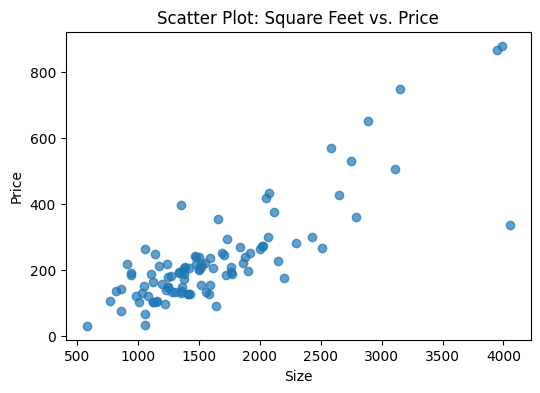

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Square Feet vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Part b. Find the correlation between the two variables.

In [ ]:
correlation = houses['size'].corr(houses['price'])
print(f'Correlation between Size and Price: {correlation}')

Correlation between Size and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

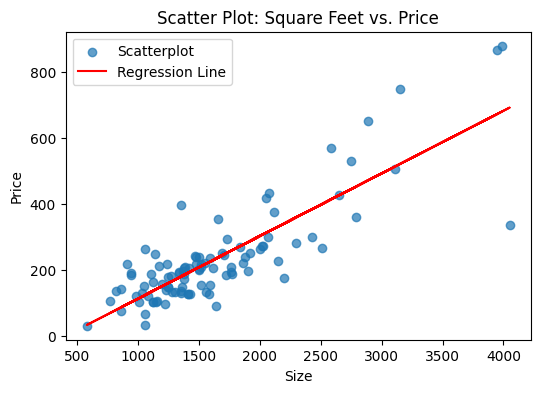

In [ ]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot: Square Feet vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

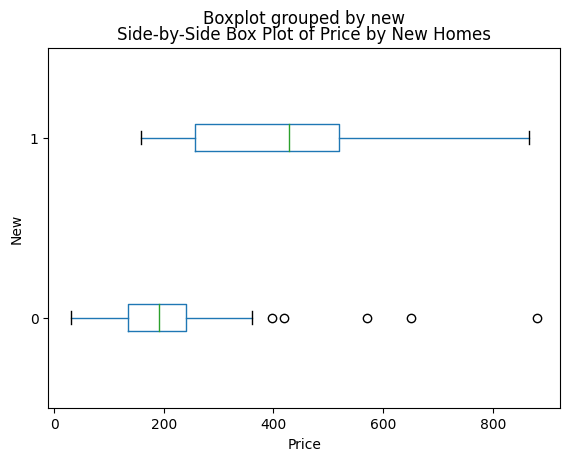

In [ ]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False, grid=False)
plt.title('Side-by-Side Box Plot of Price by New Homes')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There's a linear relationship between size and price. When the size of the house increases, the price also increases. On average, new houses are more expensive than not new houses.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [ ]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep = "\\s+")
happy.head(10)

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
5,6,1,1,male
6,7,1,1,male
7,8,1,1,male
8,9,1,1,male
9,10,1,1,male


In [ ]:
pd.crosstab(happy["marital"],happy["happiness"])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
